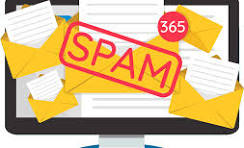

# <code style="background:yellow;color:black;font-family:Roboto">SPAM EMAIL DETECTION</code>

## 1.  Importing Libraries

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

## 2. Data Preprocessing

In [15]:
email = pd.read_csv('spam.csv')
email.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
email.tail()

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [17]:
email.shape

(5572, 2)

In [18]:
email.size

11144

#### ___Removing leading and trailing whitespaces from the column names of a DataFrame 'email'___

In [19]:
email.columns = email.columns.str.strip()

#### ___Lowering the case of the text in the DataFrame 'email'___

In [21]:
emailcolumns = email.columns.str.lower()

#### ___Removing NULL and Duplicate Messages in the DataFrame 'email'___

In [22]:
email.columns

Index(['Category', 'Message'], dtype='object')

In [23]:
email.isna().sum()

Category    0
Message     0
dtype: int64

In [24]:
email[email.duplicated(subset=['Category','Message'],keep=False)]

,Category,Message
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


keep=False indicating that all instances of the duplicated rows should be marked as True.

In [25]:
email.drop_duplicates(subset=['Category','Message'],keep='first',inplace=True)

In [26]:
email.shape

(5157, 2)

In [27]:
email.size

10314

##### ___Converting Categorical Values of Column 'Category' into Numerical___

In [28]:
email.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5157 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5157 non-null   object
 1   Message   5157 non-null   object
dtypes: object(2)
memory usage: 120.9+ KB


In [29]:
email.describe()

,Category,Message
count,5157,5157
unique,2,5157
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


In [39]:
email['Category'].value_counts().to_frame()

,Category
ham,4516
spam,641


It sets the value to 1 for rows where the 'category' column originally had the value 'spam'.   
It sets the value to 0 for rows where the 'category' column originally had the value 'ham'.

In [30]:
email.loc[email['Category']=='spam','Category']=1
email.loc[email['Category']=='ham','Category']=0

Changing the type of the Column 'Category'

In [31]:
email['Category'] = email['Category'].astype('int64')

In [32]:
email.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5157 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5157 non-null   int64 
 1   Message   5157 non-null   object
dtypes: int64(1), object(1)
memory usage: 120.9+ KB


In [33]:
email.describe()

,Category
count,5157.000000
mean,0.124297
std,0.329952
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


<Axes: xlabel='Category', ylabel='count'>

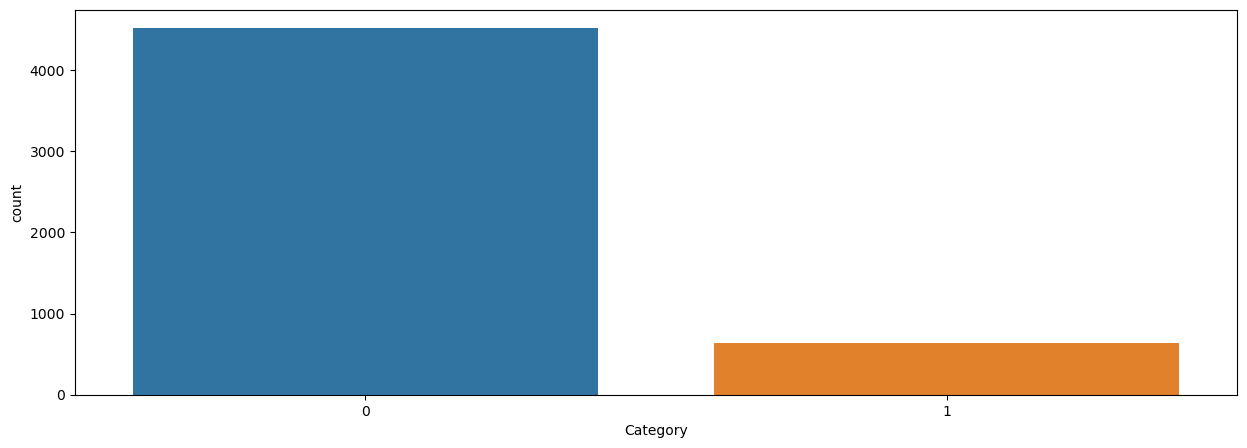

In [34]:
plt.figure(figsize=(15,5))
sns.countplot(data=email,x='Category')

But, the dataset containing the columns 'Category' is imbalanced  
And, it has to be balanced to train the model

#####  __Balancing the distribution of both classes in the 'category' column.__

There is a need to perform a down-sampling on a DataFrame to address class imbalance in the 'category' column.  
This technique is commonly used when dealing with imbalanced datasets to prevent the model from being biased towards the majority class. 

In [35]:
# Displays the count of each unique value in the 'category' column before any resampling
email['Category'].value_counts().to_frame

<bound method Series.to_frame of 0    4516
1     641
Name: Category, dtype: int64>

In [36]:
# Defining Resampling function to perform down sampling
from sklearn.utils import resample

# Creating a Dataframe of column of 'category' in 'email' containing majority of columns i.e category=0 
email_majority=email[email['Category']==0]


# Creating a Dataframe of column of 'category' in 'email' containing minority of columns i.e category=1
email_minority=email[email['Category']==1]

# Appying Resampling function in the dataframe
# Performs down-sampling on the majority class (category 0) to match the number of samples in the minority class (category 1).
email_majority_downsample=resample(email_majority,replace=False,n_samples=641,random_state=42)

# Concatenates the down-sampled majority class DataFrame with the minority class DataFrame to create a balanced DataFrame email_df.
email_df = pd.concat([email_majority_downsample,email_minority])

In [37]:
# Displays the count of each unique value in the 'category' column after resampling
email_df['Category'].value_counts().to_frame

<bound method Series.to_frame of 0    641
1    641
Name: Category, dtype: int64>

Count  Plot to show that the dataset is balanced

<Axes: xlabel='Category', ylabel='count'>

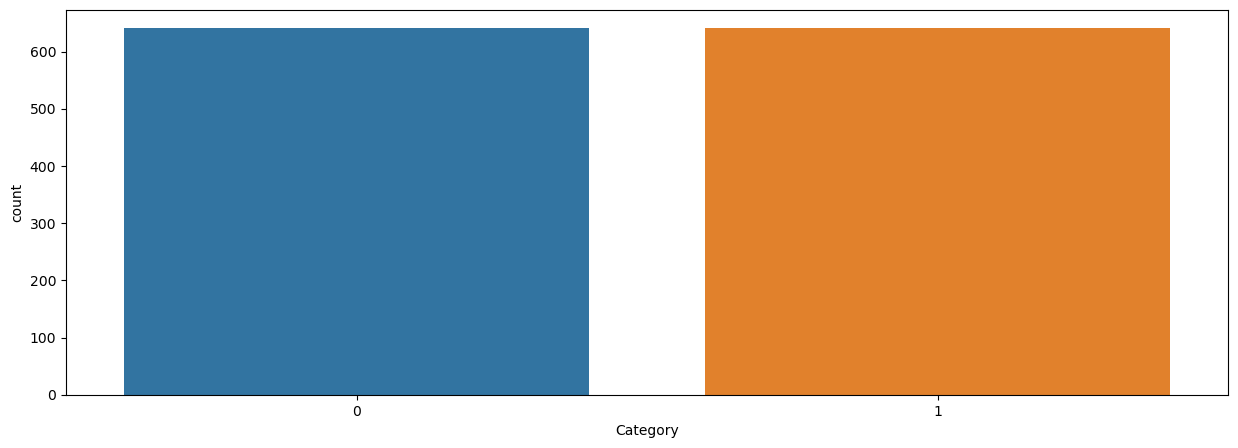

In [38]:
plt.figure(figsize=(15,5))
sns.countplot(data=email_df,x='Category')

## 3. Splitting Dataset

In [40]:
x = email_df['Message']
y = email_df['Category']

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [42]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((897,), (385,), (897,), (385,))

## 4. Feature Extraction 
### Extracting the features of a Text Classification Model to Segregate the Spam and Ham Emails

TF-IDF (Term Frequency-Inverse Document Frequency) is a numerical statistic that is used to evaluate the importance of a word in a document relative to a collection of documents.   
It creates a Sparse Matrix  
    - Rows: Each row corresponds to a document in the input corpus. 
    - Columns: Each column corresponds to a unique term (word) present in the entire corpus.  
    - The values in the matrix represent the TF-IDF scores for each term in each document.  
    - Higher values indicate that a term is more important in a particular document.  \
    - The resulting matrix will have dimensions (number of documents) x (number of unique terms in the corpus)  

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

#### ___Create Model___

In [44]:
fe = TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)

#### ___Training the Model___

In [45]:
x_train_fe=fe.fit_transform(x_train)
x_test_fe=fe.transform(x_test)

In [46]:
x_train_fe

<897x3360 sparse matrix of type '<class 'numpy.float64'>'
	with 9708 stored elements in Compressed Sparse Row format>

In [47]:
x_test_fe

<385x3360 sparse matrix of type '<class 'numpy.float64'>'
	with 3228 stored elements in Compressed Sparse Row format>

<div class="alert alert-block alert-info">
<b>NOTE:</b></b> Use the model deployed for the text classification to train a Logistic Regressor by implementing all the TF-IDF features on the model in order to create a custom text classification model.</div>

## 5. Model Training

In [48]:
from sklearn.linear_model import LogisticRegression

#### ___Create logistic Regresion Model___

In [50]:
lr=LogisticRegression(max_iter=500)

##### __Fitting Model__

In [52]:
lr.fit(x_train_fe,y_train)

LogisticRegression(max_iter=500)

#### ___Evaluating the  Logistic Regression Model Results which is produced from TF-IDF transformed training data___

In [53]:
lr.score(x_train_fe,y_train)

0.9888517279821628

In [54]:
lr.score(x_test_fe,y_test)

0.9558441558441558

#### ___Prediction of the test set based on the TF-IDF trained dataset model___

In [56]:
y_pred = lr.predict(x_test_fe)

## 6. Model Evaluation

In [58]:
from sklearn.metrics import confusion_matrix,recall_score,precision_score,accuracy_score,f1_score,ConfusionMatrixDisplay

In [60]:
precision_score(y_test,y_pred)

0.9766081871345029

In [61]:
recall_score(y_test,y_pred)

0.9277777777777778

In [62]:
accuracy_score(y_test,y_pred)

0.9558441558441558

In [63]:
f1_score(y_test,y_pred)

0.9515669515669516

## 7. Visualization

### ___Confusion Matrix___

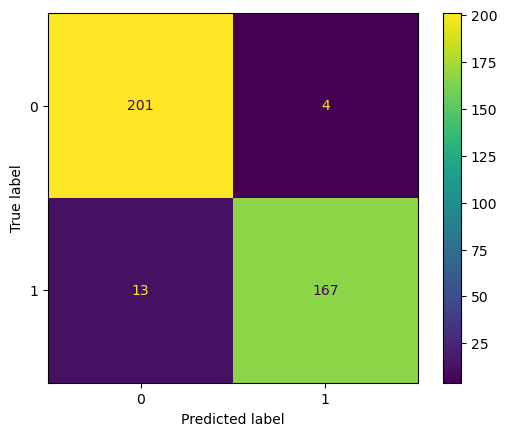

In [67]:
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred,labels=lr.classes_),display_labels=lr.classes_)
cmd.plot()

## 7. Model Deployment

In [77]:
enter_your_mail=['i am happy to do dinner with you']

In [78]:
input_mail_features=fe.transform(enter_your_mail)

In [79]:
predict=lr.predict(input_mail_features)

In [80]:
if predict==1:
    print('Mail is Spam')
else:
    print('Mail is not Spam')

Mail is not Spam
